In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" # needed to make the plotly.express show on github
from internproject.constants import ROOT_DATA_DIR

## You can create mark down cells in a jupyter notebooks

In [3]:
stETH_eth_apr_df = pd.read_csv(
    ROOT_DATA_DIR
    / "daily_snapshots/0xDC24316b9AE028F1497c275EB9192a3Ea0f67022_apr_df.csv",
    index_col=0,
    parse_dates=True,
)

stETH_eth_apr_df

,lp_token_total_supply,lp_token_virtual_price,pool_balance_0,pool_balance_1,block,pool_balance_market_0,pool_balance_market_1,market_eth_tvl,pool_balance_market_portion_0,pool_balance_market_portion_1,...,pool_balance_equilibrium_portion_0,pool_balance_equilibrium_portion_1,lp_token_equilibrium_eth_value,lp_token_discount_percent,raw_base_apr,raw_fee_apr,raw_incentive_apr,raw_price_apr,tokens,pool_address
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022
2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,611159.151633,1.073315,327010.832304,328955.763539,17346692.0,327010.832304,328563.331029,655574.163333,0.498816,0.501184,...,0.498518,0.501482,1.073316,-0.059825,2.509123,0.027579,0.558349,0.059825,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022
2023-05-28,610654.128662,1.073391,326570.841680,328899.738693,17353818.0,326570.841680,328769.711003,655340.552683,0.498322,0.501678,...,0.498223,0.501777,1.073391,-0.019837,2.523983,0.037325,0.568891,0.019837,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022
2023-05-29,609484.819092,1.073456,325048.472011,329206.924687,17360948.0,325048.472011,328911.759629,653960.231640,0.497046,0.502954,...,0.496822,0.503178,1.073456,-0.045115,2.398935,0.000000,0.598686,0.045115,"['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',...",0xDC24316b9AE028F1497c275EB9192a3Ea0f67022


In [4]:
stETH_eth_apr_df.columns

Index(['lp_token_total_supply', 'lp_token_virtual_price', 'pool_balance_0',
       'pool_balance_1', 'block', 'pool_balance_market_0',
       'pool_balance_market_1', 'market_eth_tvl',
       'pool_balance_market_portion_0', 'pool_balance_market_portion_1',
       'lp_token_market_eth_value', 'pool_balance_equilibrium_0',
       'pool_balance_equilibrium_1', 'equilibrium_eth_tvl',
       'pool_balance_equilibrium_portion_0',
       'pool_balance_equilibrium_portion_1', 'lp_token_equilibrium_eth_value',
       'lp_token_discount_percent', 'raw_base_apr', 'raw_fee_apr',
       'raw_incentive_apr', 'raw_price_apr', 'tokens', 'pool_address'],
      dtype='object')

In [5]:
df = pd.read_parquet(ROOT_DATA_DIR / 'filtered_base_returns.parquet')
df

,0x7f39C581F595B53c5cb19bD0b3f8dA6c935E2Ca0,0xae78736Cd615f374D3085123A210448E74Fc6393,0xBe9895146f7AF43049ca1c1AE358B0541Ea49704,0xac3E018457B222d93114458476f3E3416Abbe38F,0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593,0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0x5E8422345238F34275888049021821E8E08CAa1f,0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84
timestamp,,,,,,,,,
2022-10-10,5.220667,4.483714,3.669468,0.000000,1.188036,0,0,0,5.220667
2022-10-11,5.174335,4.389765,3.661489,0.000000,1.180355,0,0,0,5.174335
2022-10-12,4.995617,4.439662,3.571309,0.000000,1.168376,0,0,0,4.995617
2022-10-13,5.044227,3.452633,3.543885,0.000000,1.133465,0,0,0,5.044227
2022-10-14,5.126864,4.855039,3.581838,0.013494,1.247734,0,0,0,5.126864
...,...,...,...,...,...,...,...,...,...
2023-05-27,5.003411,4.410217,4.114438,5.267191,4.602436,0,0,0,5.003411
2023-05-28,5.030095,3.241012,4.111782,4.933320,4.571418,0,0,0,5.030095
2023-05-29,4.767568,4.022885,3.820664,4.909645,4.242716,0,0,0,4.767568


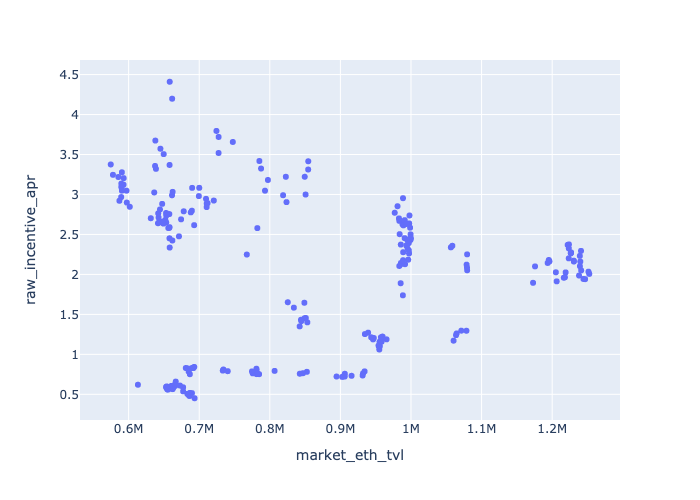

In [6]:
px.scatter(stETH_eth_apr_df, y='raw_incentive_apr', x='market_eth_tvl')

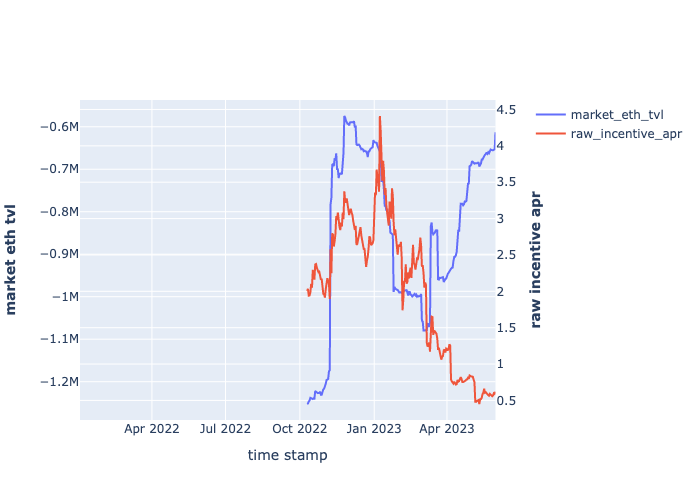

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=stETH_eth_apr_df.index, y=-stETH_eth_apr_df['market_eth_tvl'], name='market_eth_tvl'), 
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=stETH_eth_apr_df.index, y=stETH_eth_apr_df['raw_incentive_apr'], name='raw_incentive_apr'), 
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="time stamp")

# Set y-axes titles
fig.update_yaxes(title_text="<b>market eth tvl</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>raw incentive apr</b>", secondary_y=True)


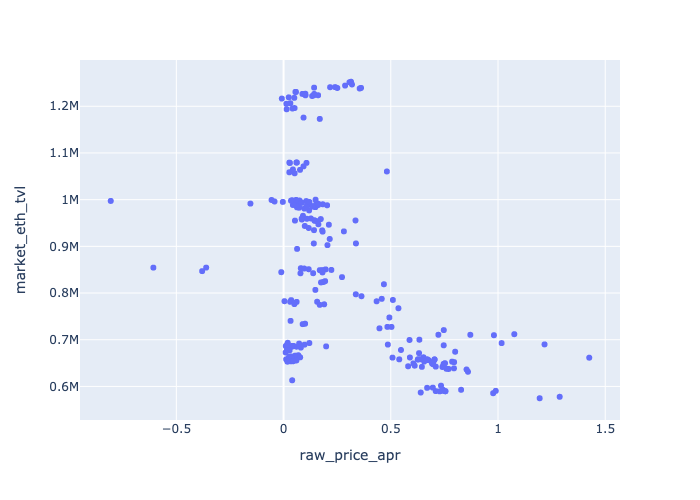

In [8]:
px.scatter(stETH_eth_apr_df, x='raw_price_apr', y='market_eth_tvl')

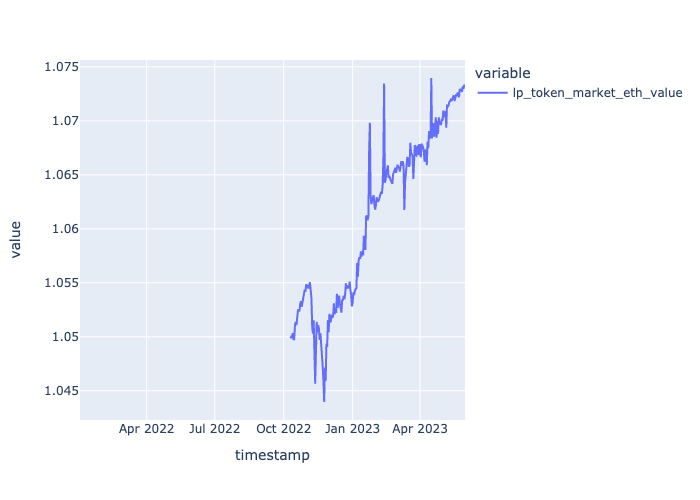

In [9]:
px.line(stETH_eth_apr_df['lp_token_market_eth_value'])